# Sztuczna inteligencja

Sprawozdanie z trzeciej listy na labolatoriach ze sztucznej inteligencji na
 5 semestrze studiów Informatyki Algorytmicznej w formie notatnika w pythonie.

In [18]:
import sys
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
import seaborn as sns; sns.set()  # for plot styling
import os

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# print('Training Data: {}'.format(x_train.shape))
# print('Training Labels: {}'.format(y_train.shape))

/var/folders/g9/z_311l35107_m9csxbzvqpzm0000gn/T/ipykernel_2102/3801869184.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


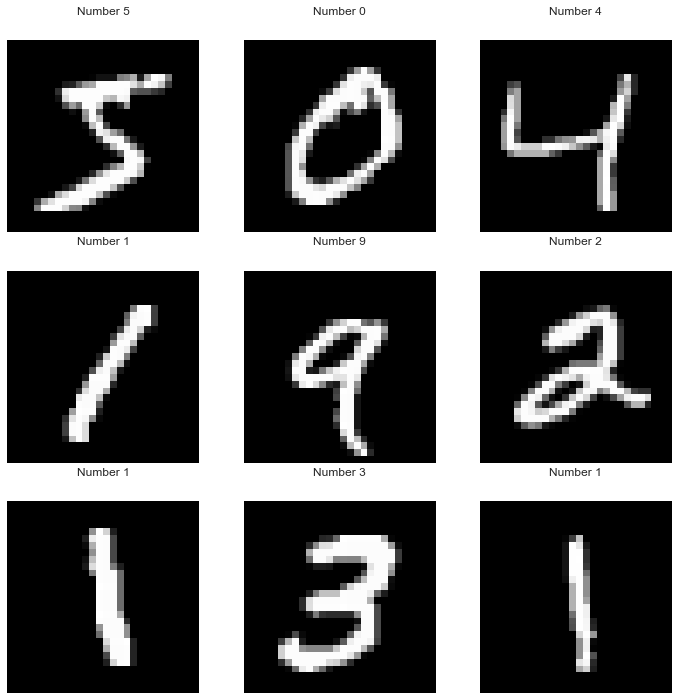

In [5]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))

# display the figure
fig.show()

In [6]:
# preprocessing the images

# convert each image to 1 dimensional array
X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [161]:
n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits, init='k-means++')

# Fit the model to the training data
kmeans.fit(X)

print(kmeans.labels_)
print(X[0].shape)

10
[8 6 5 ... 0 8 4]
(784,)


In [8]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        # print(labels)
        # print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))

    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """

    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key

    return predicted_labels

In [9]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[3 0 4 1 9 8 1 3 1 8 3 1 3 6 1 7 6 8 1 8]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [185]:
def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    # print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

Number of Clusters: 2
Inertia: 2964093.092537867
Number of Clusters: 3
Inertia: 2819691.56883723
Number of Clusters: 4
Inertia: 2741440.8588126665
Number of Clusters: 5
Inertia: 2665640.6018754216
Number of Clusters: 6
Inertia: 2592940.902021015
Number of Clusters: 7
Inertia: 2505142.0758689693
Number of Clusters: 8
Inertia: 2441284.2703890437
Number of Clusters: 9
Inertia: 2444462.387736099
Number of Clusters: 10
Inertia: 2386114.5410087155
Number of Clusters: 11
Inertia: 2345419.253509016
Number of Clusters: 12
Inertia: 2330543.6111988714
Number of Clusters: 13
Inertia: 2282029.1119844266
Number of Clusters: 14
Inertia: 2269165.7340674894
Number of Clusters: 15
Inertia: 2223126.536530524
Number of Clusters: 16
Inertia: 2212373.2472156845
Number of Clusters: 17
Inertia: 2205119.513456506
Number of Clusters: 18
Inertia: 2167388.8635036424
Number of Clusters: 19
Inertia: 2147815.229339277


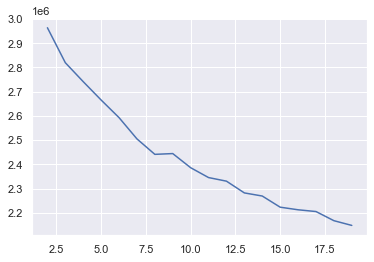

In [190]:
clusters = [10, 16, 36, 64, 144, 256]
clusters = range(2,20)
inertiaarray = []


# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)

    # print cluster metrics
    calculate_metrics(estimator, X, Y)

    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)


    inertiaarray.append(estimator.inertia_)
    # calculate and print accuracy
    # print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

plt.plot(clusters, inertiaarray)
plt.show()

In [173]:
# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

# predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)

# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.9017



/var/folders/g9/z_311l35107_m9csxbzvqpzm0000gn/T/ipykernel_2102/2714764669.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


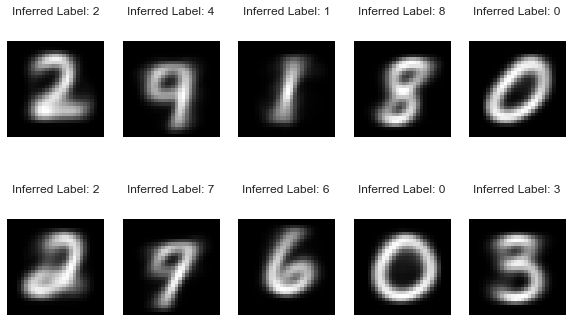

In [174]:
CL = 10

# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = CL)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(CL, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(2, 5, figsize = (10, 6))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):

    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))

    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')

# display the figure
fig.show()

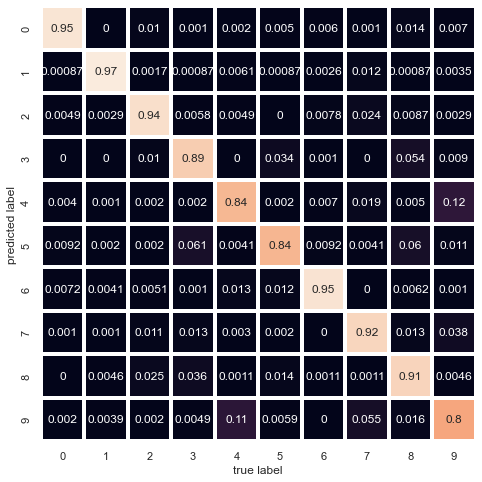

In [175]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, predicted_labels, normalize='pred')

plt.figure(figsize=(15,8))
sns.heatmap(mat.T, square=True, annot=True, cbar=False, linewidths=3.5)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [15]:
from PIL import Image
img2 = Image.open('2_1.png').convert("L")
img = np.resize(img2, (1,784,1))
im2arr = np.array(img)
im2arr = im2arr.reshape(len(im2arr), -1)
# im2arr = im2arr.reshape(len(im2arr), -1)
im2arr = im2arr.astype(float) / 255.

print(len([im2arr]))

# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 10)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

# predict labels for testing data
# test_clusters = kmeans.predict(X_test)

# print(im2arr.shape)
# print(X_test.shape)

test_clusters = kmeans.predict(im2arr)
predicted_labels = infer_data_labels(kmeans.predict(im2arr), cluster_labels)
print(test_clusters)
print(predicted_labels)

# calculate and print accuracy
# print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))


1
[5]
[1]


In [20]:
def imagedir(masterdir):
    img_dirs = sorted(os.listdir(masterdir))
    dirs = []
    true_label_dirs = []

    for img_dir in img_dirs:
        dirs.append(os.path.join(masterdir, img_dir))
        true_label_dirs.append(int(img_dir[:1]))

    return dirs, true_label_dirs

In [139]:
kmeans = MiniBatchKMeans(n_clusters = 10)
kmeans.fit(X)

dirs, true_label_dirs = imagedir('/Volumes/SamsungT5/ai/l2/mydata/myvalidation')
im = []
pl = []
correct = 0
cluster_labels = infer_cluster_labels(kmeans, Y)

for i in range(len(dirs)):
    img2 = Image.open(dirs[i]).convert('L')
    img = np.resize(img2, (1, 784, 1))
    im2arr = np.array(img)
    im2arr = im2arr.reshape(len(im2arr), -1)
    im2arr = im2arr.astype(float) / 255.
    # images.append(im2arr)

    X_clusters = kmeans.predict(im2arr)
    predicted_labels = infer_data_labels(X_clusters, cluster_labels)
    print("Predict: ", predicted_labels[0], "true label: ",true_label_dirs[i])
    pl.append(predicted_labels[:20])

    im.append(im2arr)

    if predicted_labels[0] == true_label_dirs[i]:
        correct += 1

print(correct/30)

im2 = np.array(im)
# print(im2.shape)
im2 = im2.reshape((len(im2), -1))
# print(im2.shape)

Predict:  0 true label:  0
Predict:  4 true label:  0
Predict:  1 true label:  0
Predict:  1 true label:  1
Predict:  7 true label:  1
Predict:  1 true label:  1
Predict:  2 true label:  2
Predict:  1 true label:  2
Predict:  1 true label:  2
Predict:  3 true label:  3
Predict:  1 true label:  3
Predict:  1 true label:  3
Predict:  1 true label:  4
Predict:  7 true label:  4
Predict:  7 true label:  4
Predict:  1 true label:  5
Predict:  1 true label:  5
Predict:  6 true label:  5
Predict:  4 true label:  6
Predict:  4 true label:  6
Predict:  1 true label:  6
Predict:  1 true label:  7
Predict:  1 true label:  7
Predict:  1 true label:  7
Predict:  6 true label:  8
Predict:  1 true label:  8
Predict:  2 true label:  8
Predict:  3 true label:  9
Predict:  1 true label:  9
Predict:  7 true label:  9
0.16666666666666666


In [45]:
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(im2arr)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[1]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


/var/folders/g9/z_311l35107_m9csxbzvqpzm0000gn/T/ipykernel_2102/2711168102.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


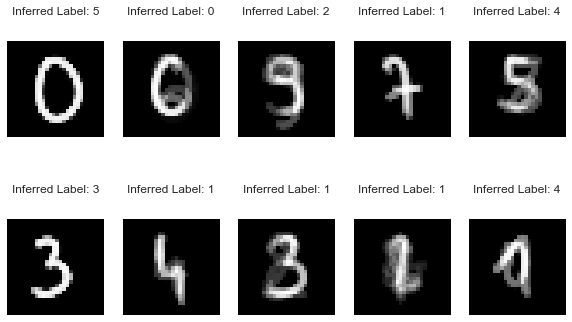

In [147]:
CL = 10
kmeans = MiniBatchKMeans(n_clusters = CL)
kmeans.fit(im2)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(CL, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(2, 5, figsize = (10, 6))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):

    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))

    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')

# display the figure
fig.show()

# print(im2arr.shape)
# print(images.shape)
# print(pl[:20])

# kmeans.cluster_centers_

In [191]:
import pandas as pd

def kMeansRes(scaled_data, k, alpha_k=0.02):
    '''
    Parameters
    ----------
    scaled_data: matrix
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns
    -------
    scaled_inertia: float
        scaled inertia value for current k
    '''

    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = MiniBatchKMeans(n_clusters=k).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia
    # return kmeans.inertia_

def chooseBestKforKMeans(scaled_data, k_range):
    ans = []
    for k in k_range:
        scaled_inertia = kMeansRes(scaled_data, k)
        ans.append((k, scaled_inertia))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

/Users/mateusztofil/Documents/aod/l1/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/mateusztofil/Documents/aod/l1/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


([<matplotlib.axis.XTick at 0x144edb880>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

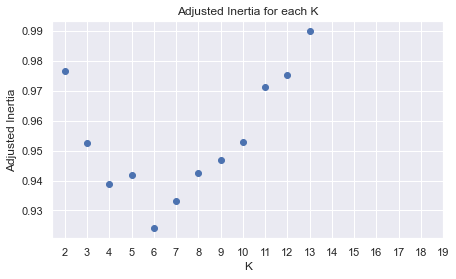

In [192]:
# # choose k range
# k_range=range(2,14)
#
# # print(x_test.shapex)
#
# data_matrix = np.matrix(X).astype(float)
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# scaled_data = mms.fit_transform(data_matrix)
#
# # compute adjusted intertia
# best_k, results = chooseBestKforKMeans(scaled_data, k_range)
#
# # plot the results
# plt.figure(figsize=(7,4))
# plt.plot(results,'o')
# plt.title('Adjusted Inertia for each K')
# plt.xlabel('K')
# plt.ylabel('Adjusted Inertia')
# plt.xticks(range(2,20,1))

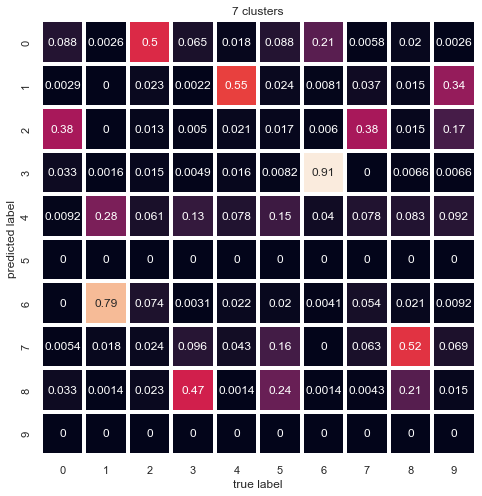

2381588.68565993


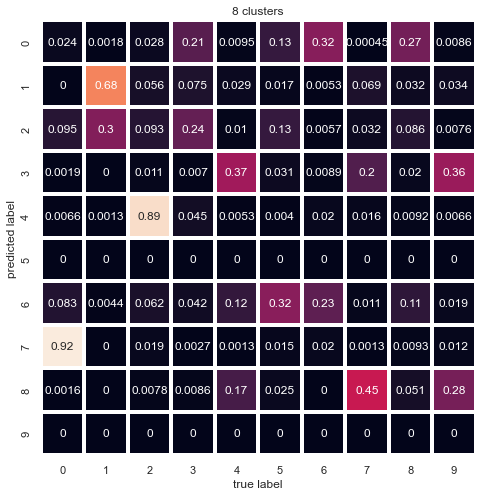

2366422.9414072908


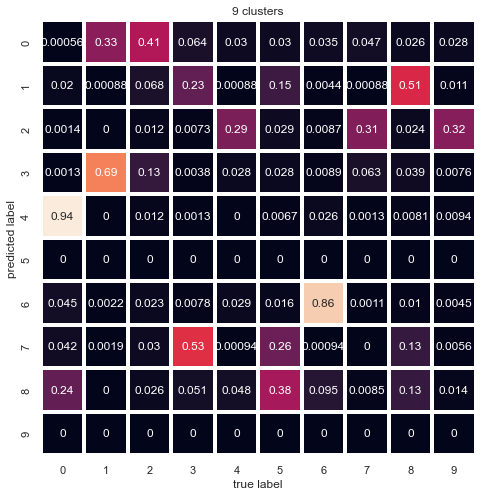

2359394.8225610373


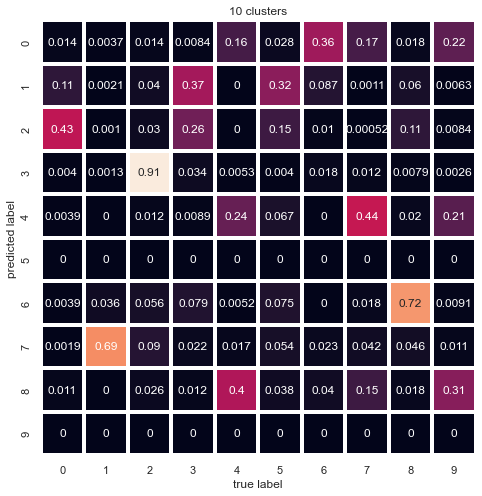

2368847.0410958687


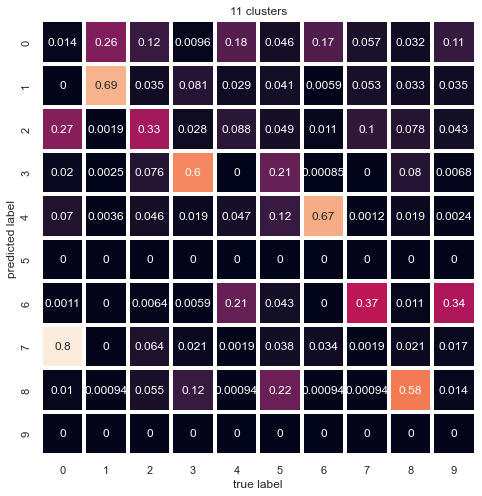

2394253.6294021867


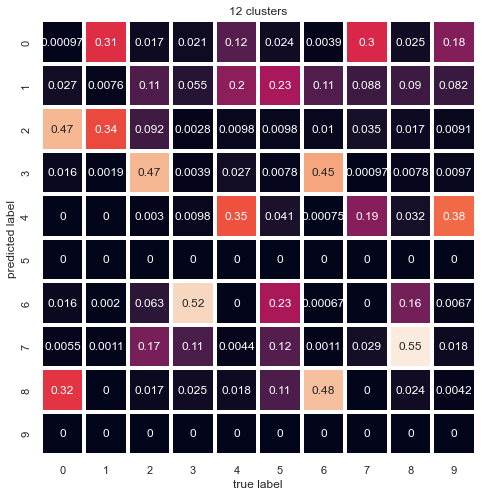

2380165.5476360237


In [181]:
clusters = range(7,13)

for c in clusters:
    kmeans = MiniBatchKMeans(n_clusters=10)
    kmeans.fit(X)

    predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)

    mat = confusion_matrix(y_test, predicted_labels, normalize='pred')

    plt.figure(figsize=(15,8))
    sns.heatmap(mat.T, square=True, annot=True, cbar=False, linewidths=3.5)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title('{} clusters'.format(c))
    plt.show()

    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    # kmeans = MiniBatchKMeans(n_clusters=c).fit(scaled_data)
    # scaled_inertia = kmeans.inertia_ / inertia_o + 0.02 * c
    # print(scaled_inertia)
    # print(kmeans.inertia_)
